<a href="https://colab.research.google.com/github/Rohit792A/Medical-Image-Processing/blob/main/Image_filter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Median filter of all Images

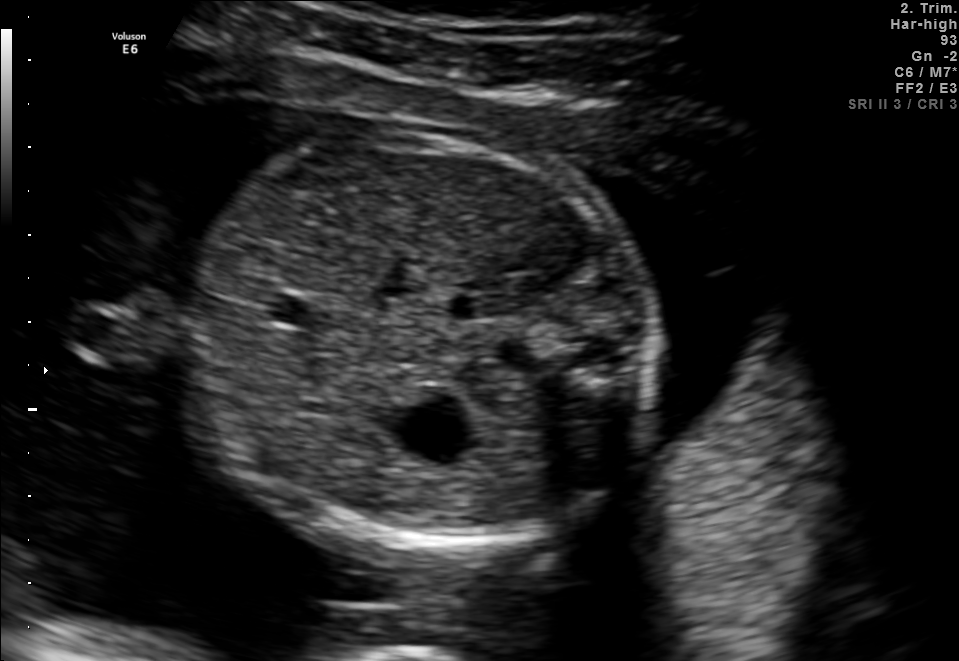

Original Image 



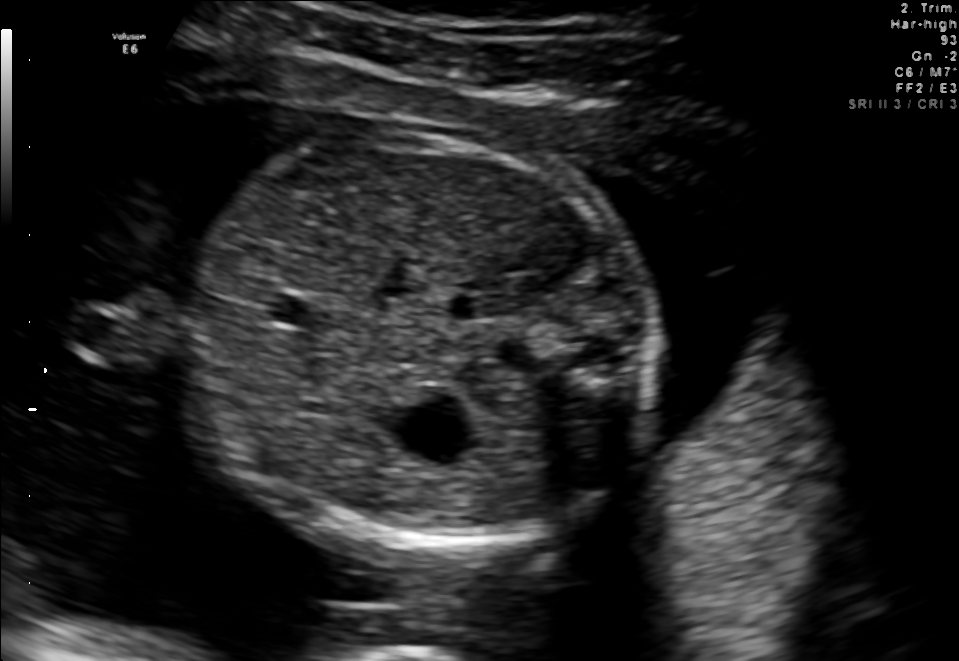

cv2 median



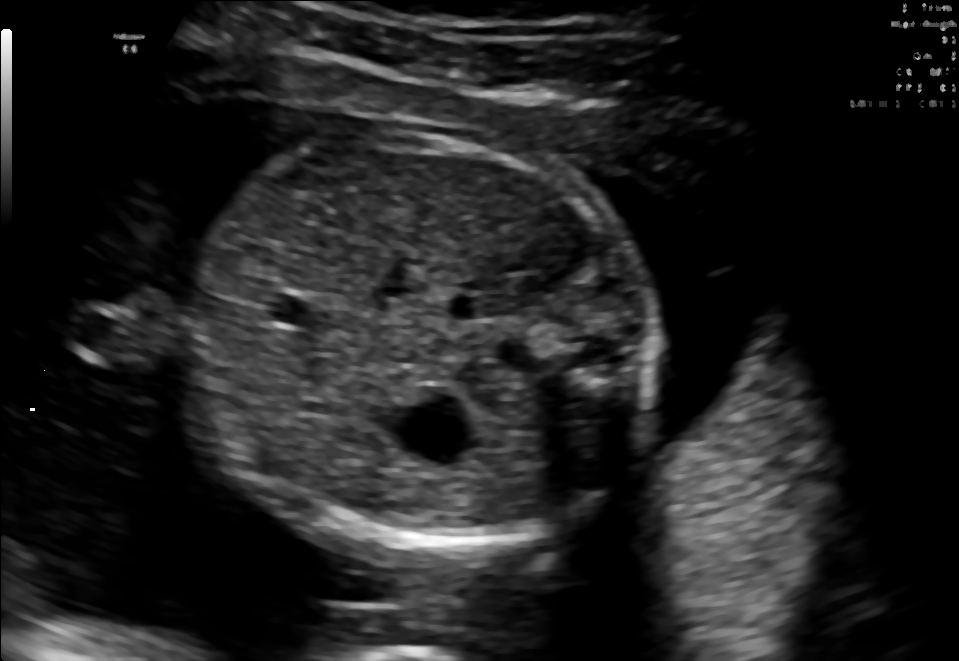

Using skimage Median


In [97]:
#Median Filter

from google.colab.patches import cv2_imshow 
import cv2             
from skimage.filters import median
import matplotlib.pyplot as plt


img_HC = cv2.imread("/content/Figure 3_Fetal abdomen.png", 0)
img_salt_pepper_noise = cv2.imread("/content/Figure 3_Fetal abdomen.png", 0)


img=img_HC

median_using_cv2 = cv2.medianBlur(img, 3)

from skimage.morphology import disk  
median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)


cv2_imshow(img)

print("Original Image \n")

cv2_imshow( median_using_cv2)
print("cv2 median\n")
cv2_imshow(median_using_skimage)
print("Using skimage Median" )
plt.imsave("Median_filter_3.png",median_using_cv2,cmap="gray")

cv2.waitKey(0)          
cv2.destroyAllWindows() 

## Calculating PSNR values 

In [69]:
import cv2  
img_ori= cv2.imread("/content/Figure 3_Fetal abdomen.png")
img_FFt=cv2.imread("/content/Figure_3_FFt.png")
img_Ani=cv2.imread("/content/Figure_3_aniso.png")
img_NLM=cv2.imread("/content/Figure_3_nlm.png")
img_Gau=cv2.imread("/content/Gaussian_Filter_3.png")
img_Mean=cv2.imread("/content/Mean_Filter_3.png")
img_Med=cv2.imread("/content/Median_filter_3.png")
img_Wie= cv2.imread("/content/Wiener_Filter_3.png")

In [22]:
from math import log10, sqrt
import cv2
import numpy as np


def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) / 255
    img2 = img2.astype(np.float64) / 255
    mse = np.mean((img1 - img2) ** 2)
    print(mse)
    if mse == 0:
        return "Same Image"
    return 10 * log10(1. / mse)

In [75]:
psnr = compute_psnr(img_ori,img_FFt)
print(psnr)

1.044414104639277e-06
59.811272717345354


In [76]:
psnr = compute_psnr(img_ori,img_Ani)
print(psnr)

0.0026687286482174498
25.736955822907362


In [77]:
psnr = compute_psnr(img_ori,img_NLM)
print(psnr)

1.1680504149775361e-05
49.325384119547564


In [78]:
psnr = compute_psnr(img_ori,img_Gau)
print(psnr)

0.00020013667159304445
36.98673327099393


In [79]:
psnr = compute_psnr(img_ori,img_Mean)
print(psnr)

0.0008109707397326551
30.90994815088341


In [80]:
psnr = compute_psnr(img_ori,img_Med)
print(psnr)

0.04190362124929249
13.777484443218038


In [82]:
psnr = compute_psnr(img_ori,img_Wie)
print(psnr)

0.00622476735628815
22.058768751990264


In [89]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [90]:
snr = signaltonoise(img_FFt, axis=None) 
print(snr)

0.7846823295335408


In [91]:
snr = signaltonoise(img_Ani, axis=None)
print(snr)

0.8597162068102313


In [92]:
snr = signaltonoise(img_NLM, axis=None)
print(snr)

0.7833691829972432


In [93]:
snr = signaltonoise(img_Gau, axis=None)
print(snr)

0.7917006196154857


In [94]:
snr = signaltonoise(img_Mean, axis=None)
print(snr)

0.8136541589576655


In [95]:
snr = signaltonoise(img_Med, axis=None)
print(snr)

1.0423750806794485


In [96]:
snr = signaltonoise(img_Wie, axis=None)
print(snr)

1.0518610572480067


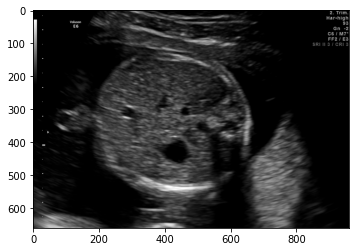

In [65]:
#Gaussian Filter

import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from skimage import io, img_as_float
from skimage.filters import gaussian

img_gaussian_noise = img_as_float(io.imread('/content/Figure 3_Fetal abdomen.png', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('/content/Figure 3_Fetal abdomen.png', as_gray=True))

img = img_gaussian_noise

gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
#sigma defines the std dev of the gaussian kernel. SLightly different than 
#how we define in cv2

plt.imshow( img,cmap='gray')
plt.imsave("Gaussian_Filter_3.png", gaussian_using_cv2 , cmap='gray')

#cv2.imshow("Using scipy2", conv_using_scipy2)

#cv2.waitKey(0)          
#cv2.destroyAllWindows() 

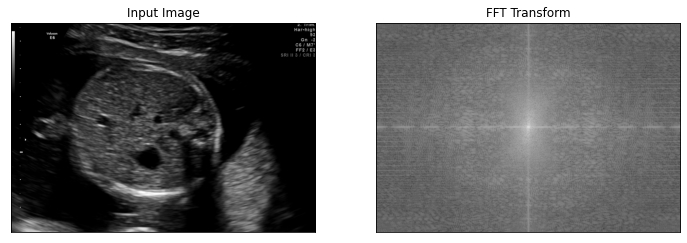

In [45]:
#Fourier Transform


import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/Figure 3_Fetal abdomen.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig = plt.figure(figsize=(12, 12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Transform'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imsave("Figure_3_FFt.png", img, cmap='gray')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 8.5 MB/s 
     |████████████████████████████████| 48.4 MB 1.8 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754471 sha256=78a96e4b79bbbf9b473f59372c60a49e1d6ed4c0c69b35056b23203acb775e07
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


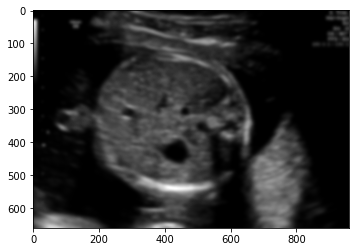

In [43]:
# Anisotropic Diffusion
!pip install medpy
import matplotlib.pyplot as plt
from skimage import io
import medpy
from medpy.filter.smoothing import anisotropic_diffusion
from skimage import img_as_float


noisy_img = img_as_float(io.imread("Figure 3_Fetal abdomen.png", as_gray=True))

# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 

plt.imshow(img_aniso_filtered, cmap='gray')
plt.imsave("Figure_3_aniso.png", img_aniso_filtered, cmap='gray')

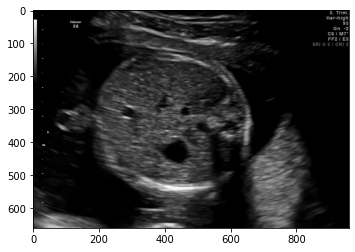

In [44]:
#NLM Filter

import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

noisy_img = io.imread("Figure 3_Fetal abdomen.png", as_gray=True)  #Only 8 bit supported for CV2 NLM

# fastNlMeansDenoising(InputArray src, OutputArray dst, float h=3, int templateWindowSize=7, int searchWindowSize=21 )

NLM_CV2_denoise_img = cv2.fastNlMeansDenoising(noisy_img, None, 3, 7, 21)


plt.imsave("Figure_3_nlm.png", NLM_CV2_denoise_img, cmap='gray')
plt.imshow(NLM_CV2_denoise_img, cmap='gray')

In [54]:
#Wiener Filter

import cv2

from skimage import color, data, restoration
img_a=cv2.imread("/content/Figure 3_Fetal abdomen.png")
img = color.rgb2gray(img_a)

from scipy.signal import convolve2d
 
psf = np.ones((5, 5)) / 25
img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 1100)


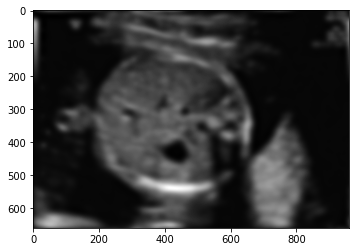

In [62]:
plt.imshow(deconvolved_img,cmap="gray")
plt.imsave("Wiener_Filter_3.png",deconvolved_img,  cmap='gray')plt.imsave("Wiener_Filter_3.png",deconvolved_img,  cmap='gray')

In [57]:
#Mean Filter

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/Figure 3_Fetal abdomen.png")
kernel = np.ones((5,5),np.float32)/25    # kernel or the mask created
dst = cv2.filter2D(img,-1,kernel)        # Mean filter

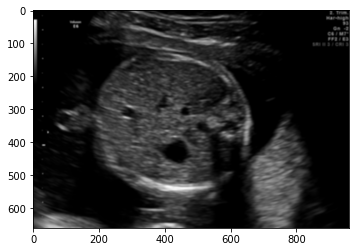

In [63]:
plt.imshow(dst)
plt.imsave("Mean_Filter_3.png",dst,  cmap='gray')